# Test Logistic Regression with Trimming

In [1]:
import numpy as np
import sys
sys.path.append("../src")
import solver
import utils
import simulate

In [2]:
# load data
# data_folder = "../data/"
# training_images = np.load(data_folder + "train_images.npy")
# training_labels = np.load(data_folder + "train_labels.npy")
# testing_images = np.load(data_folder + "test_images.npy")
# testing_labels = np.load(data_folder + "test_labels.npy")

# image_shape = (28, 28)

# training_data = utils.ImageData(training_images, image_shape, labels=training_labels)
# testing_data = utils.ImageData(testing_images, image_shape, labels=testing_labels)

In [3]:
# simulate data
training_data = simulate.simulate_images((28, 28), [100, 100, 20])
testing_data = simulate.simulate_images((28, 28), [10, 10, 0])

In [4]:
model = solver.BinaryLogisticRegression(training_data, lam=0.1, inlier_pct=0.9)

In [5]:
classifier, outliers = model.fit_model(verbose=True)

initial obj: 6.93e-01
iter 1, obj 2.70e-01, err 4.57e+00
iter 2, obj 2.16e-01, err 1.44e+00
iter 3, obj 2.14e-01, err 1.27e-03
iter 4, obj 2.14e-01, err 4.34e-06
iter 5, obj 2.14e-01, err 5.79e-11


In [6]:
classifier.modify_class_labels(np.array([0.0, 1.0]))
pred_labels = classifier.classify_images(testing_data.images)
print("number of mislabels in testing data:", np.sum(pred_labels != testing_data.labels))

number of mislabels in testing data: 0


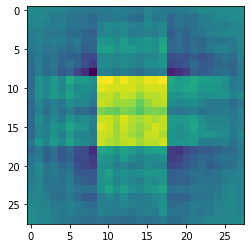

In [7]:
classifier.plot_classifier()

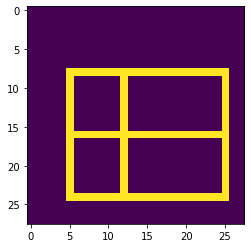

In [8]:
outliers.plot_image(19)